**MASTER'S DEGREE IN APPLIED ARTIFICIAL INTELLIGENCE**.

**Course: TC5044.10 - Machine learning operations**

Tecnológico de Monterrey

Professor 	
Dr. Gerardo Rodríguez Hernández

**Week 5**
Phase 1 | Project Progress

---
**Team 40**
*   Student: Jorge Antonio Acosta Rosales
*   Registration: A01381552

In [1]:
# Run this command in your local environment to install the required packages
#pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1**. EDA

Data set assign to work on:
https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

Summary of the dataset:
The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.
* Features: 6
* Instances: 10000

**Variable Information**

| Variable Name | Role | Type | Description | Units | Missing Values |
| --- | --- | --- | --- | --- | --- |
| UID | ID | Integer |  | no |
| Product ID | ID | Categorical |  | no |
| Type | Feature | Categorical |  | no |
| Air temperature | Feature | Continuous | Kelvin (K) | no |
| Process temperature | Feature | Continuous | Kelvin (K) | no |
| Rotational speed | Feature | Integer | revolutions per minute (rpm) | no |
| Torque | Feature | Continuous | Newton-meters (Nm) | no |
| Tool wear | Feature | Integer | minutes | no |
| Machine failure | Target | Integer |  | no |
| TWF | Target | Integer |  | no |

**Note:**

**UID:** Unique Identifier (likely a unique identifier for each instance or sample in the dataset)

**TWF:** Time To Work Failure ( likely a measure of how long an asset is operational before failing, in this case, likely in minutes)

In [3]:
# Getting familiar with the data
raw_df = pd.read_csv('../data/raw/ai4i2020.csv')
raw_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
print("Basic information about the data:\nDescription:")
raw_df.describe()

Basic information about the data:
Description:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
print("Information:")
raw_df.info()
print("\nShape:")
raw_df.shape

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64

(10000, 14)

In [6]:
numerical_columns = raw_df.select_dtypes(include = ['int', 'float']).columns
categorical_columns = raw_df.select_dtypes(include = ['object','category']).columns

print("Numerical columns: ", numerical_columns.to_list())
print("Categorical columns: ", categorical_columns.to_list())
print("Number of numerical columns:", len(numerical_columns))
print("Number of categorical columns:", len(categorical_columns))

Numerical columns:  ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Categorical columns:  ['Product ID', 'Type']
Number of numerical columns: 12
Number of categorical columns: 2


In [7]:
# Show the statistics of the numerical columns
raw_df[numerical_columns].describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [8]:
# Show the statistics of the categorical columns
raw_df[categorical_columns].describe()

,Product ID,Type
count,10000,10000
unique,10000,3
top,L57163,L
freq,1,6000


In [9]:
raw_df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

# Visualizations

In [10]:
# Define a function to create histograms and boxplots for numerical columns
def plot_numerical_columns(df, numerical_columns):

    # Set the style for seaborn plots
    sns.set_style("whitegrid")
    # Calculating the number of rows needed for the subplots
    n_columns = 4
    n_rows = int(len(numerical_columns) * 2 / n_columns)
    
    if len(numerical_columns) * 2 % n_columns != 0:
        n_rows += 1

    # Create subplots
    fig, axs = plt.subplots(n_rows, n_columns, figsize=(17, 3 * n_rows))

    for i, column in enumerate(numerical_columns):
        row = (i * 2) // n_columns
        col = (i * 2) % n_columns

        # Histogram
        sns.histplot(df[column], bins=30, ax=axs[row, col], kde=True)
        axs[row, col].set_title(f'Histogram of {column}')

        # Boxplot
        sns.boxplot(x=df[column], ax=axs[row, col + 1])
        axs[row, col + 1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

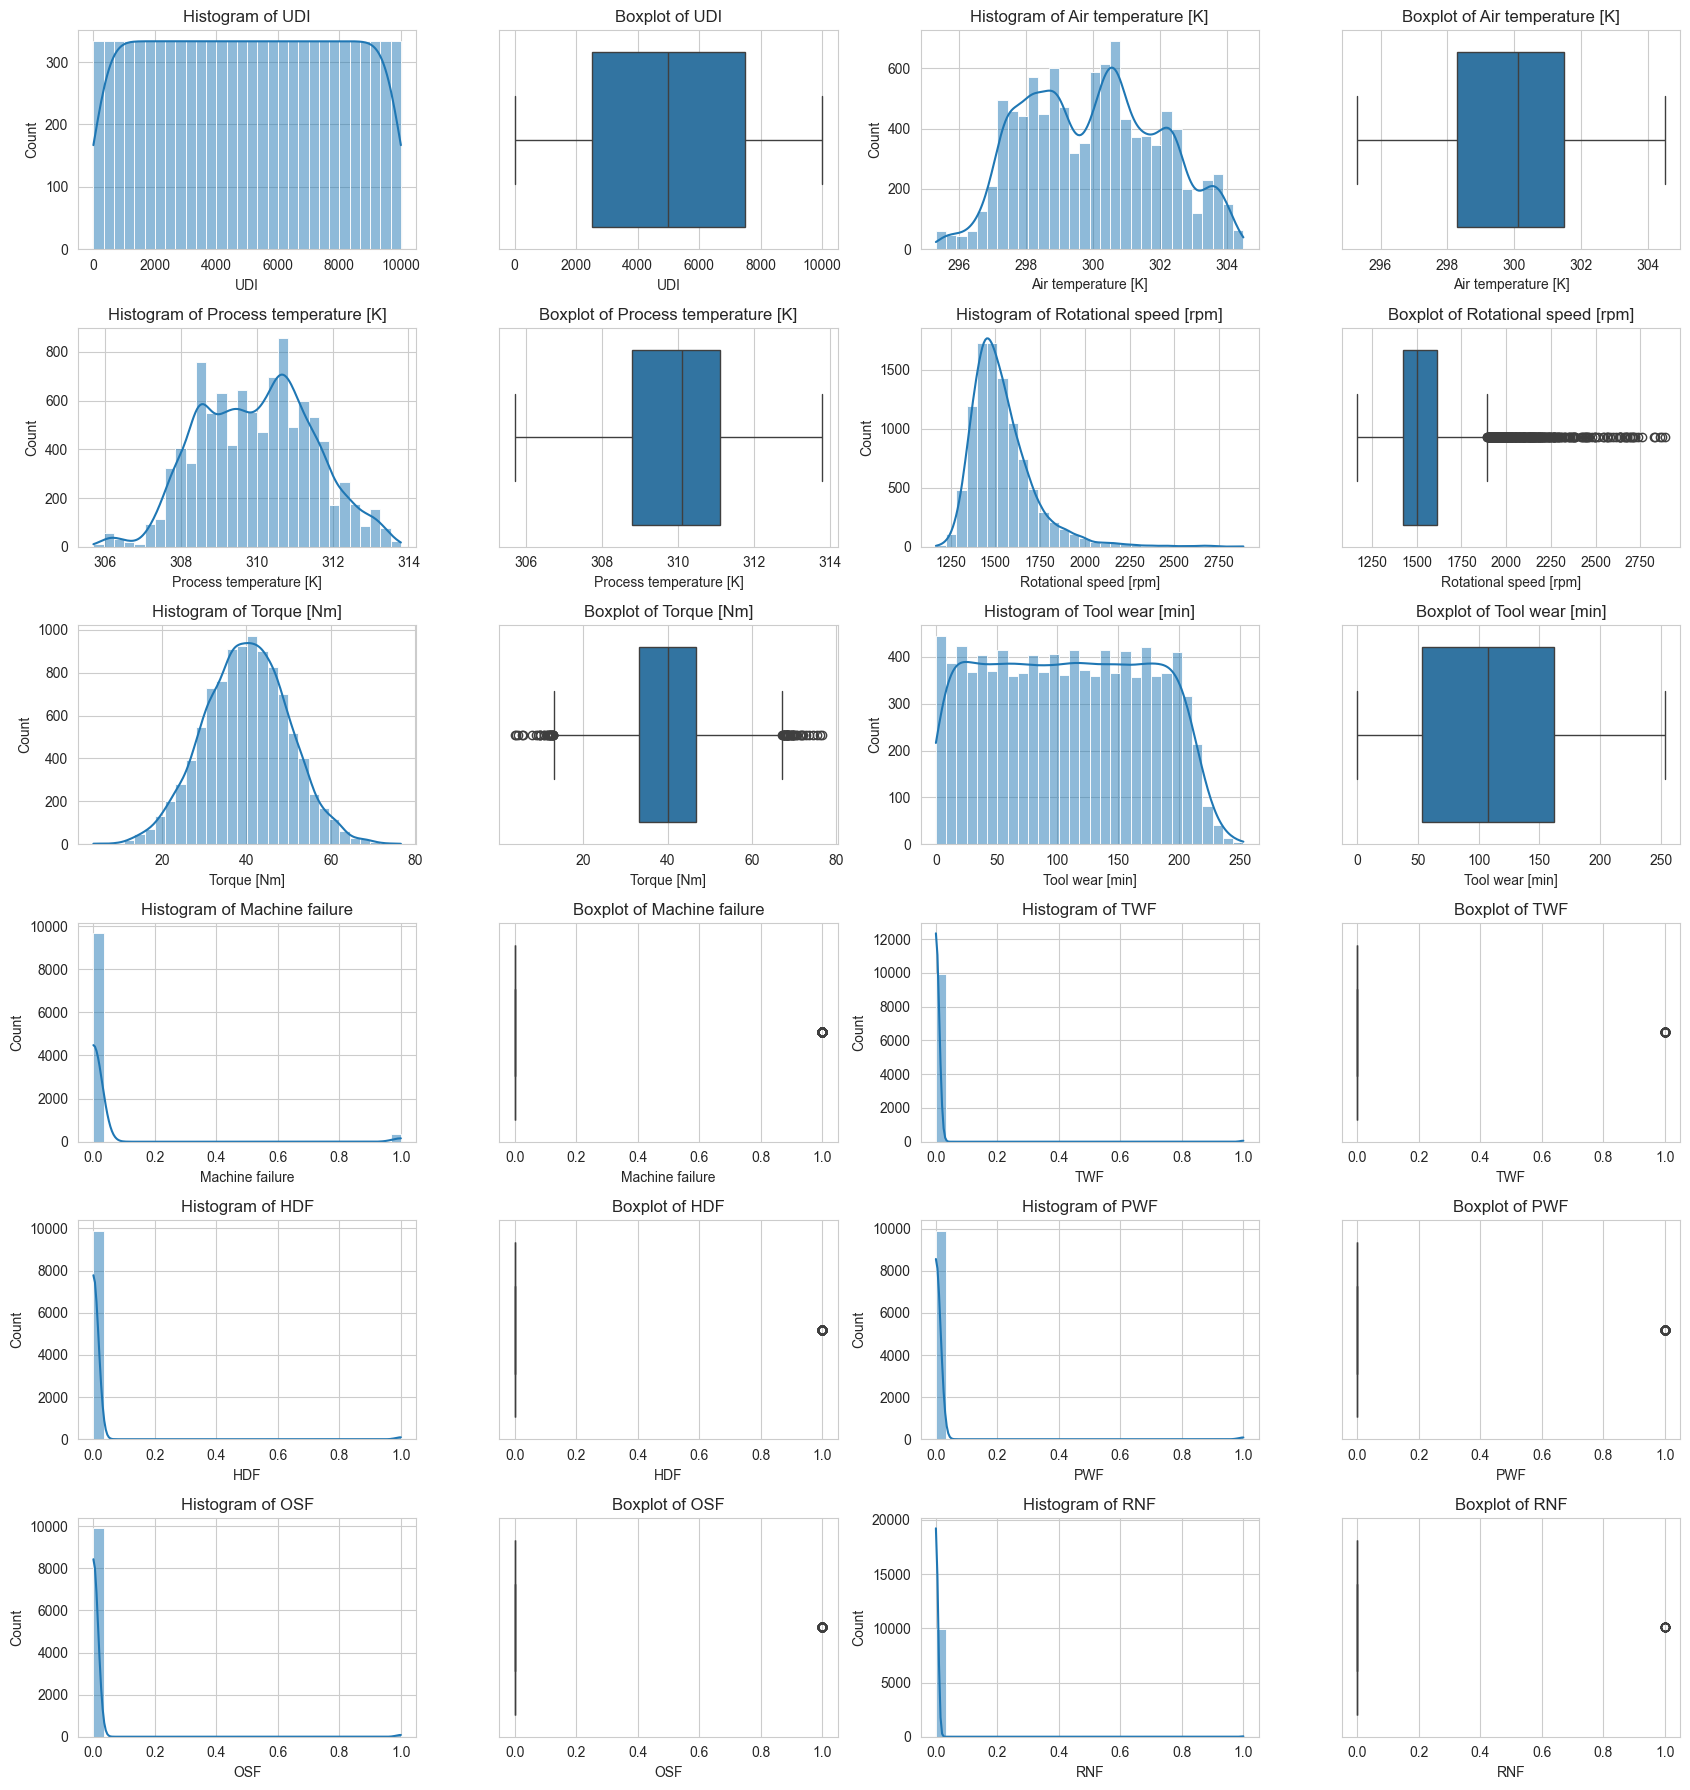

In [11]:
# Plot histograms and boxplots for numerical columns
plot_numerical_columns(raw_df, numerical_columns)

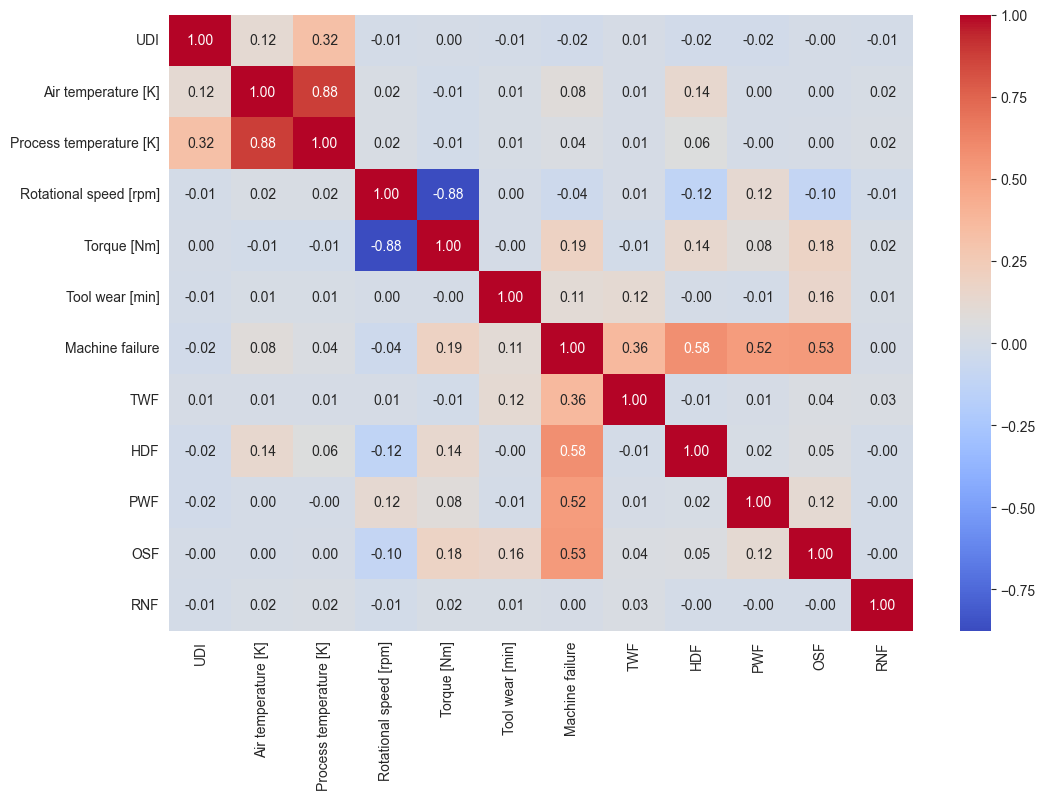

In [12]:
# Looking at the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(raw_df[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


# Preprocessing and Feature Engineering

In [13]:
interim_df = raw_df.drop(["Product ID", "Type"], axis=1)
output_path = "../data/interim/interim_data.csv"
interim_df.to_csv(output_path, index=False)

In [14]:
from sklearn.preprocessing import StandardScaler

FEATURE = "Machine failure"

scaler = StandardScaler()
features_scaled = scaler.fit_transform(interim_df.drop(FEATURE, axis=1))
features_df_scaled = pd.DataFrame(features_scaled, columns=interim_df.columns[:-1])
features_df_scaled[FEATURE] = raw_df[FEATURE]

In [15]:
numerical_columns2 = features_df_scaled.select_dtypes(include = ['int', 'float']).columns

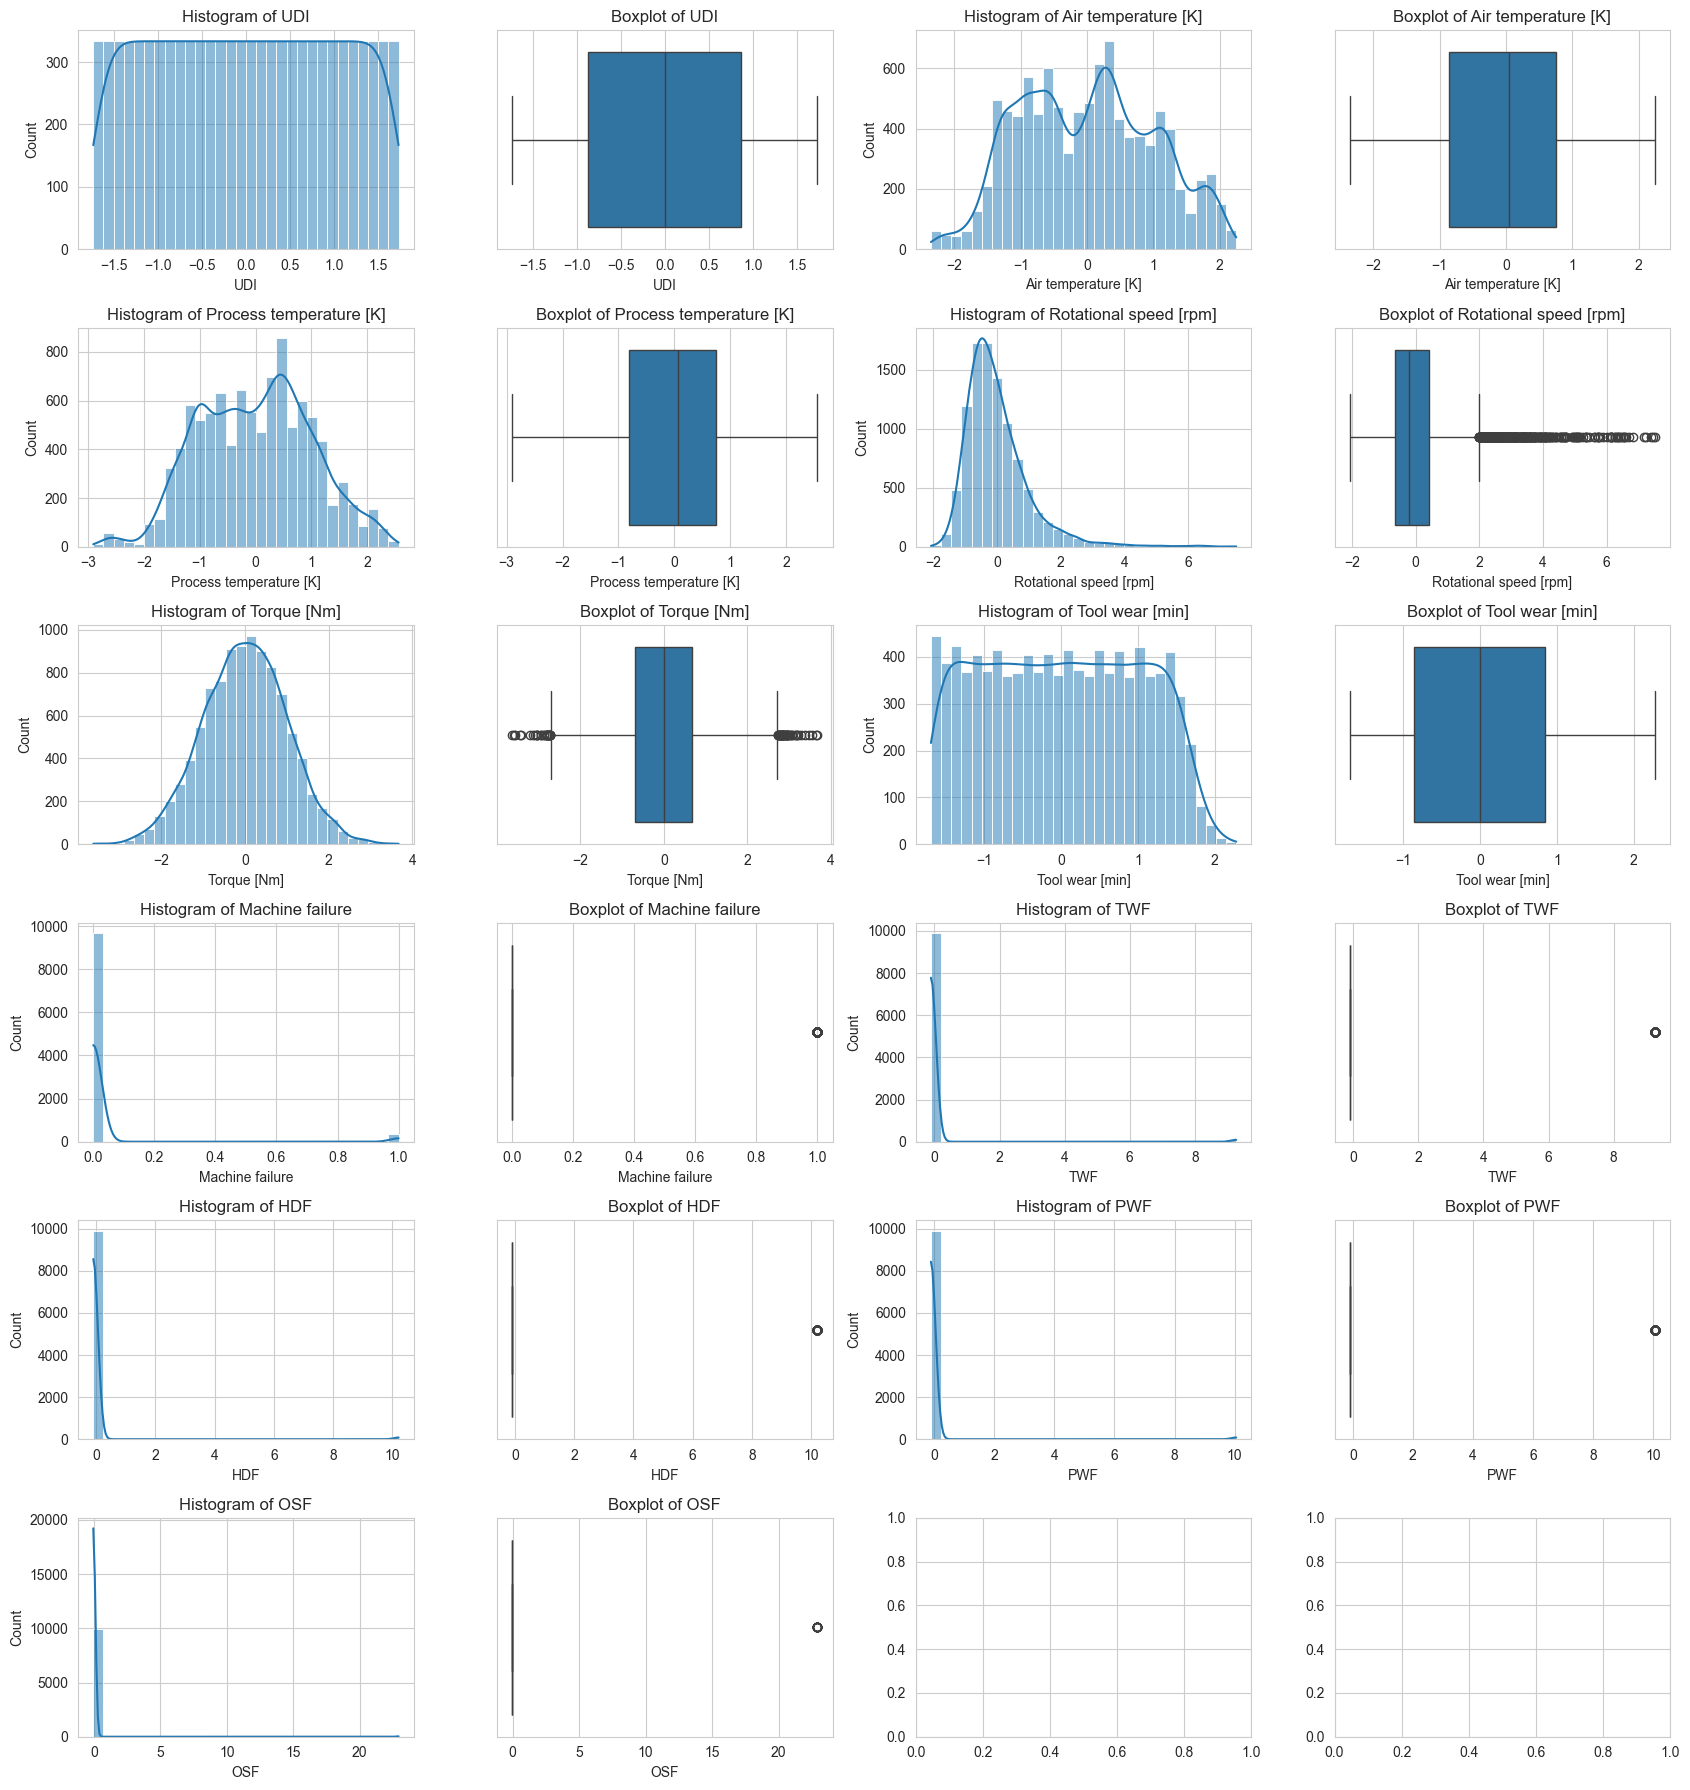

In [16]:
plot_numerical_columns(features_df_scaled, numerical_columns2)

In [23]:
# output_path = "../data/interim/interim_data.csv"
# interim_df.to_csv(output_path, index=False)
output_path = "../data/processed/processed_data.csv"
features_df_scaled.to_csv(output_path, index=False)

# Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split

X = features_df_scaled.drop(FEATURE, axis=1)
y = features_df_scaled[FEATURE]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training the model

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluating the model

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

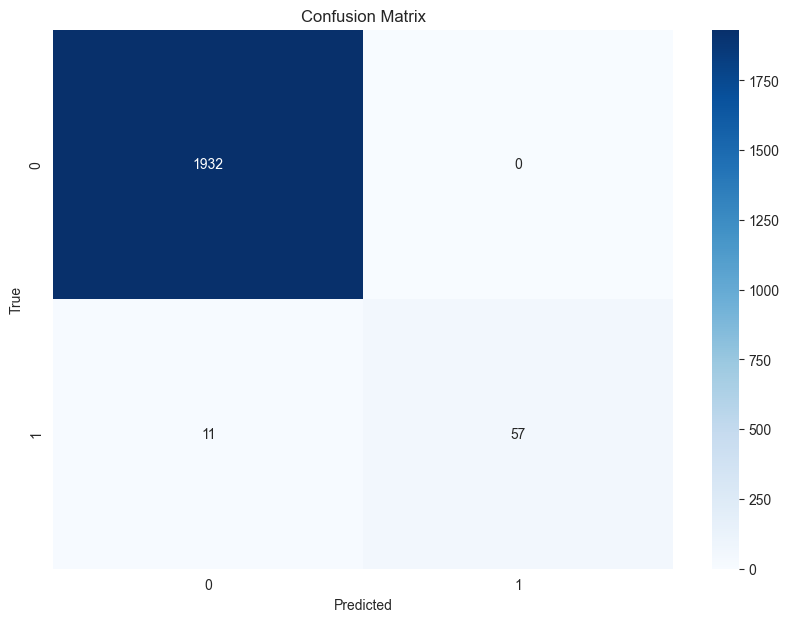

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print(report_df)

              precision    recall  f1-score    support
0              0.994339  1.000000  0.997161  1932.0000
1              1.000000  0.838235  0.912000    68.0000
accuracy       0.994500  0.994500  0.994500     0.9945
macro avg      0.997169  0.919118  0.954581  2000.0000
weighted avg   0.994531  0.994500  0.994266  2000.0000


# Improving the model

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Average accuracy with CV:", np.mean(scores))

Average accuracy with CV: 0.9947000000000001


it is noticeable that we have a dominant class so the model will tend to predict this class and its generalization capacity will be limited, it is recommended to better analyze the different characteristics of the data set and apply useful transformations to further normalize the data and avoid this overload. however, for practical purposes the exercise was left as it is to continue with the model management pipeline.